In [51]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt


In [52]:
NLST_IM_PATH = '/workspace/home/kkulkarni/Sybil/data_char/NLST/nlst_image_stats_v1.csv'
UCLA_LDCT_IM_PATH = '/workspace/home/kkulkarni/Sybil/data_char/UCLA_LDCT/ucla_ldct_image_stats_v1.csv'
UCLA_CECT_IM_PATH = '/workspace/home/kkulkarni/Sybil/data_char/UCLA_CECT/ucla_cect_image_stats_v1.csv'
LUNGX_IM_PATH = '/workspace/home/kkulkarni/Sybil/data_char/LungX/lungx_image_stats_v1.csv'

In [53]:
nlst_im_char = pd.read_csv(NLST_IM_PATH)
ucla_ldct_im_char = pd.read_csv(UCLA_LDCT_IM_PATH)
ucla_cect_im_char = pd.read_csv(UCLA_CECT_IM_PATH)
lungx_im_char = pd.read_csv(LUNGX_IM_PATH)

In [57]:
stats = 'Kurtosis'
nlst_mean = nlst_im_char[stats]
ucla_ldct_mean = ucla_ldct_im_char[stats]
ucla_cect_mean = ucla_cect_im_char[stats]
lungx_mean = lungx_im_char[stats]

data = {
    'NLST': nlst_mean,
    'UCLA LDCT': ucla_ldct_mean,
    'UCLA CECT': ucla_cect_mean,
    'LUNGx': lungx_mean
}

In [58]:
# Perform pairwise Mann-Whitney U tests
results = {}
nlst_data = data['NLST']

for dataset_name, dataset_values in data.items():
    if dataset_name != 'NLST':  # Compare only with NLST
        stat, p_value = mannwhitneyu(nlst_data, dataset_values, alternative='two-sided')
        results[dataset_name] = {'stat': stat, 'p_value': p_value}

# Apply Bonferroni correction for multiple comparisons
num_tests = len(results)
for dataset_name in results:
    results[dataset_name]['adjusted_p_value'] = min(results[dataset_name]['p_value'] * num_tests, 1.0)


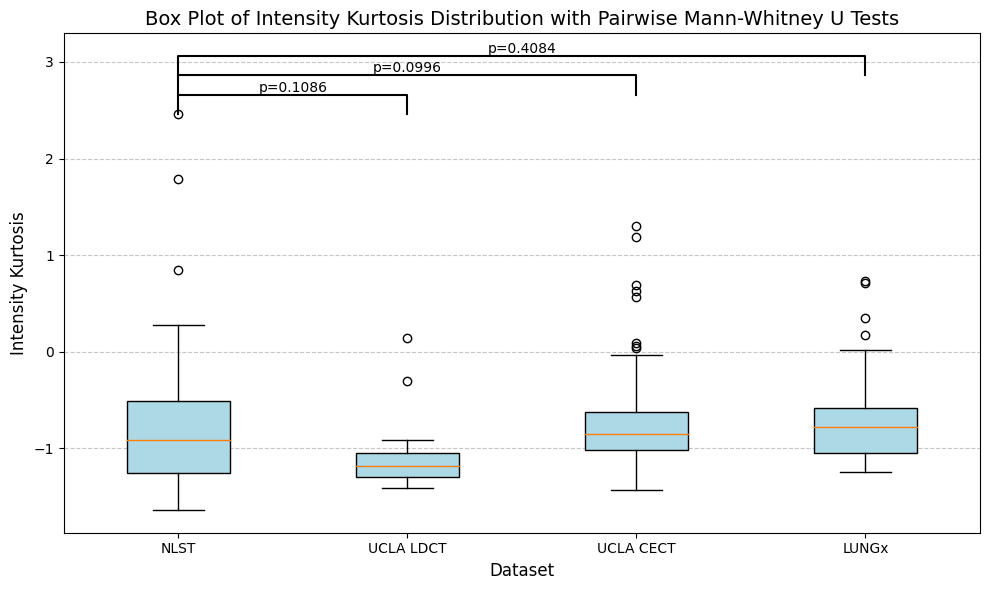

In [63]:
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(data.values(), labels=data.keys(), patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Annotate p-values with staggered heights
staggered_height = 0.2  # Distance to stagger each annotation
current_y = max(max(nlst_mean), max(ucla_ldct_mean), max(ucla_cect_mean), max(lungx_mean)) 
for i, dataset_name in enumerate(data.keys()):
    if dataset_name != 'NLST':
        p_val = results[dataset_name]['adjusted_p_value']
        x1, x2 = 1, i + 1  # NLST is at index 1
        y = current_y
        h = staggered_height

        # Draw the line
        plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], 'k-', lw=1.5)

        # Add text
        plt.text((x1 + x2) * 0.5, y + h + 0.0, f"p={p_val:.4f}", ha='center', va='bottom', fontsize=10)
        
        # Increment height for the next annotation
        current_y += staggered_height

# Add titles and labels
plt.title(f'Box Plot of Intensity {stats} Distribution with Pairwise Mann-Whitney U Tests', fontsize=14)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel(f'Intensity {stats}', fontsize=12)

# Add a grid and show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
